<a href="https://colab.research.google.com/github/vaishnovrg/Topic_classification_prediction_service/blob/main/Classification_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install nltk
!pip install sklearn

In [2]:
import csv
reviews = [row for row in csv.reader(open('Context.csv'))]

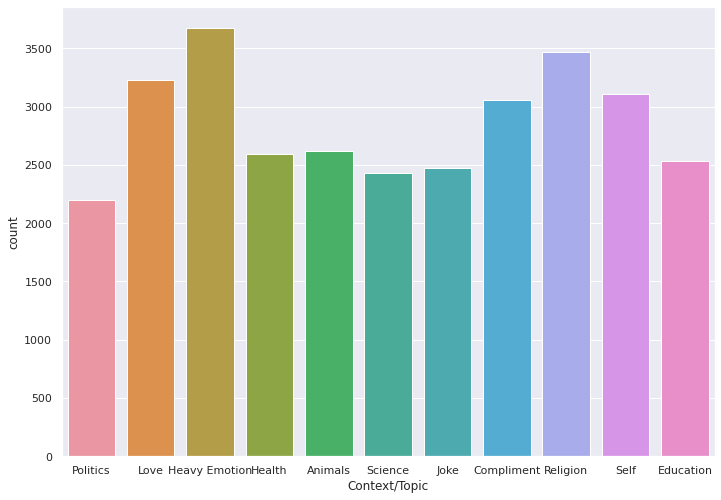

In [3]:
# bar chart plot of a categorical variable
from pandas import read_csv
from seaborn import countplot
from matplotlib import pyplot
# load the dataset
# import the seaborn library
import seaborn as sns

# import done to avoid warnings
from warnings import filterwarnings

# reading the dataset
df = read_csv('Context.csv')

# first five entries if the dataset
df.head()

#dataset = read_csv('Context.csv', header=None)
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.countplot(x ='Context/Topic', data = df)

In [4]:
import re
import nltk

# We need this dataset in order to use the tokenizer
nltk.download('punkt')
from nltk.tokenize import word_tokenize

# Also download the list of stopwords to filter out
nltk.download('stopwords')
from nltk.corpus import stopwords

from nltk.stem.porter import PorterStemmer
from nltk.stem import WordNetLemmatizer
nltk.download('wordnet')
lemmatizer = WordNetLemmatizer()
stemmer = PorterStemmer()

def process_text(text):
    # Make all the strings lowercase and remove non alphabetic characters
    text = re.sub('[^A-Za-z]', ' ', text.lower())

    # Tokenize the text; this is, separate every sentence into a list of words
    # Since the text is already split into sentences you don't have to call sent_tokenize
    tokenized_text = word_tokenize(text)

    # Remove the stopwords and stem each word to its root
    clean_text = [
        lemmatizer.lemmatize(word) for word in tokenized_text
        if word not in stopwords.words('english')
    ]

    # Remember, this final output is a list of words
    return clean_text

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


In [5]:
# Remove the first row, since it only has the labels
reviews = reviews[1:]

texts = [row[0] for row in reviews]
topics = [row[1] for row in reviews]

# Process the texts to so they are ready for training
# But transform the list of words back to string format to feed it to sklearn
#nltk.download()
texts = [" ".join(process_text(text)) for text in texts]

In [6]:
#from sklearn.feature_extraction.text import CountVectorizer
#matrix = CountVectorizer(max_features=1000)
#vectors = matrix.fit_transform(texts).toarray()

from sklearn.feature_extraction.text import TfidfVectorizer
tf = TfidfVectorizer()
vectors =  tf.fit_transform(texts)

In [7]:
from sklearn.model_selection import train_test_split
vectors_train, vectors_test, topics_train, topics_test = train_test_split(vectors, topics)

from imblearn.over_sampling import ADASYN
# Apply the random over-sampling
ada = ADASYN(sampling_strategy='minority', random_state=8, n_neighbors=3)
X_resampled, y_resampled = ada.fit_resample(vectors_train, topics_train,)

In [ ]:
import xgboost as xgb
xg_reg = xgb.XGBClassifier(random_state=1,learning_rate=0.01)

xg_reg.fit(X_resampled, y_resampled)

topics_pred = xg_reg.predict(vectors_test)

from sklearn.metrics import classification_report
print(classification_report(topics_test, topics_pred))

               precision    recall  f1-score   support

      Animals       0.80      0.37      0.50       621
   Compliment       0.79      0.44      0.57       764
    Education       0.63      0.42      0.50       597
       Health       0.68      0.25      0.36       672
Heavy Emotion       0.18      0.77      0.28       967
         Joke       0.58      0.42      0.49       622
         Love       0.63      0.37      0.47       852
     Politics       0.89      0.44      0.59       514
     Religion       0.90      0.41      0.56       864
      Science       0.53      0.25      0.34       607
         Self       0.49      0.25      0.33       767

     accuracy                           0.41      7847
    macro avg       0.65      0.40      0.46      7847
 weighted avg       0.63      0.41      0.45      7847



In [8]:
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression(random_state=0).fit(X_resampled, y_resampled)
topics_pred = clf.predict(vectors_test)

from sklearn.metrics import classification_report
print(classification_report(topics_test, topics_pred))

               precision    recall  f1-score   support

      Animals       0.81      0.69      0.74       723
   Compliment       0.73      0.67      0.70       750
    Education       0.71      0.60      0.65       634
       Health       0.64      0.60      0.62       640
Heavy Emotion       0.53      0.58      0.55       895
         Joke       0.72      0.65      0.69       600
         Love       0.62      0.58      0.60       786
     Politics       0.40      0.87      0.54       523
     Religion       0.77      0.70      0.73       888
      Science       0.60      0.50      0.55       631
         Self       0.57      0.49      0.53       777

     accuracy                           0.63      7847
    macro avg       0.65      0.63      0.63      7847
 weighted avg       0.65      0.63      0.63      7847



/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


In [10]:
import joblib
# now you can save it to a file
joblib.dump(clf, 'model.pkl') 

['model.pkl']

In [ ]:
'''
from sklearn.naive_bayes import GaussianNB
classifier = GaussianNB()
x = vectors_train.todense()
classifier.fit(x, topics_train)

# Predict with the testing set
y = vectors_test.todense()
topics_pred = classifier.predict(y)

# ...and measure the accuracy of the results
from sklearn.metrics import classification_report
print(classification_report(topics_test, topics_pred))'''